In [1]:
import numpy as np #Linear Algebra
import pandas as pd #Data Analytical
import matplotlib.pyplot as plt #Data Visualisation
import seaborn as sns #Statistical Visualisation

In [2]:
data=pd.read_csv("Dataset/insurance_claims.csv")
df = data.copy()
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [6]:
    df.shape

(1000, 40)

In [7]:
##In the data we can see that NaN values have '?' which we are going to replace with NaN
df = df[df != '?']
df.shape

(1000, 40)

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
###Dropping _c39 which does not have important information
df.drop('_c39',inplace=True,axis=1)
df.shape

(1000, 39)

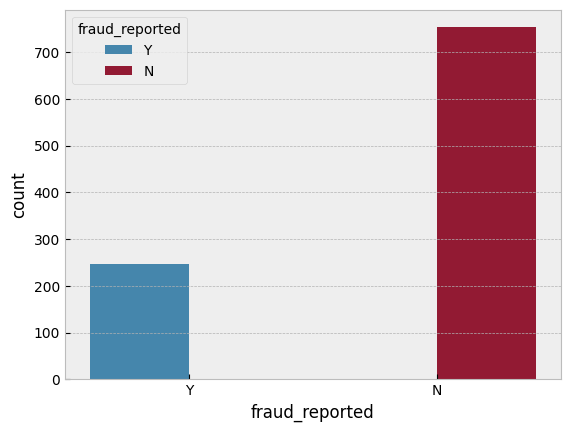

In [10]:
plt.style.use("bmh")
fig = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

In [11]:
##From the above plot we can observe that the label distribution is skewed
df['fraud_reported'].value_counts()
#Count no of frauds 

N    753
Y    247
Name: fraud_reported, dtype: int64

In [12]:
##Lets check the incident location
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

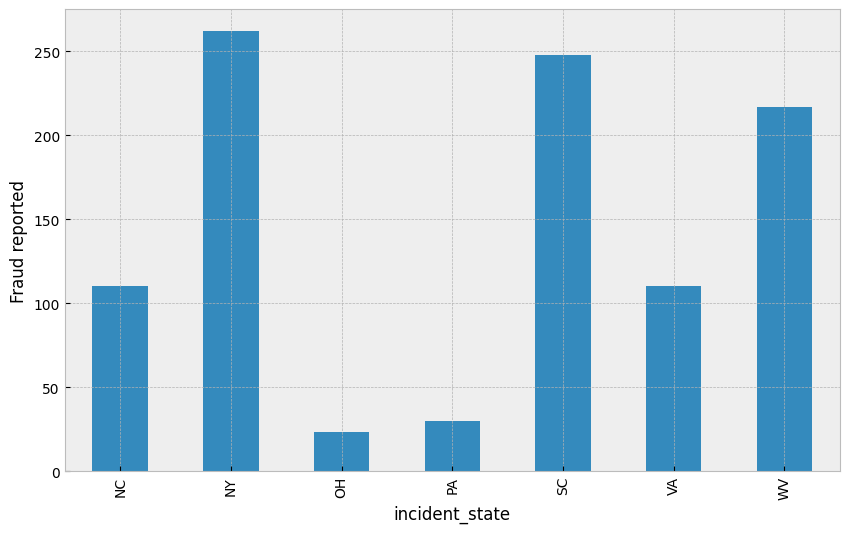

In [13]:
plt.style.use('bmh')
fig = plt.figure(figsize=(10,6))
fig = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
fig.set_ylabel('Fraud reported')
plt.show()

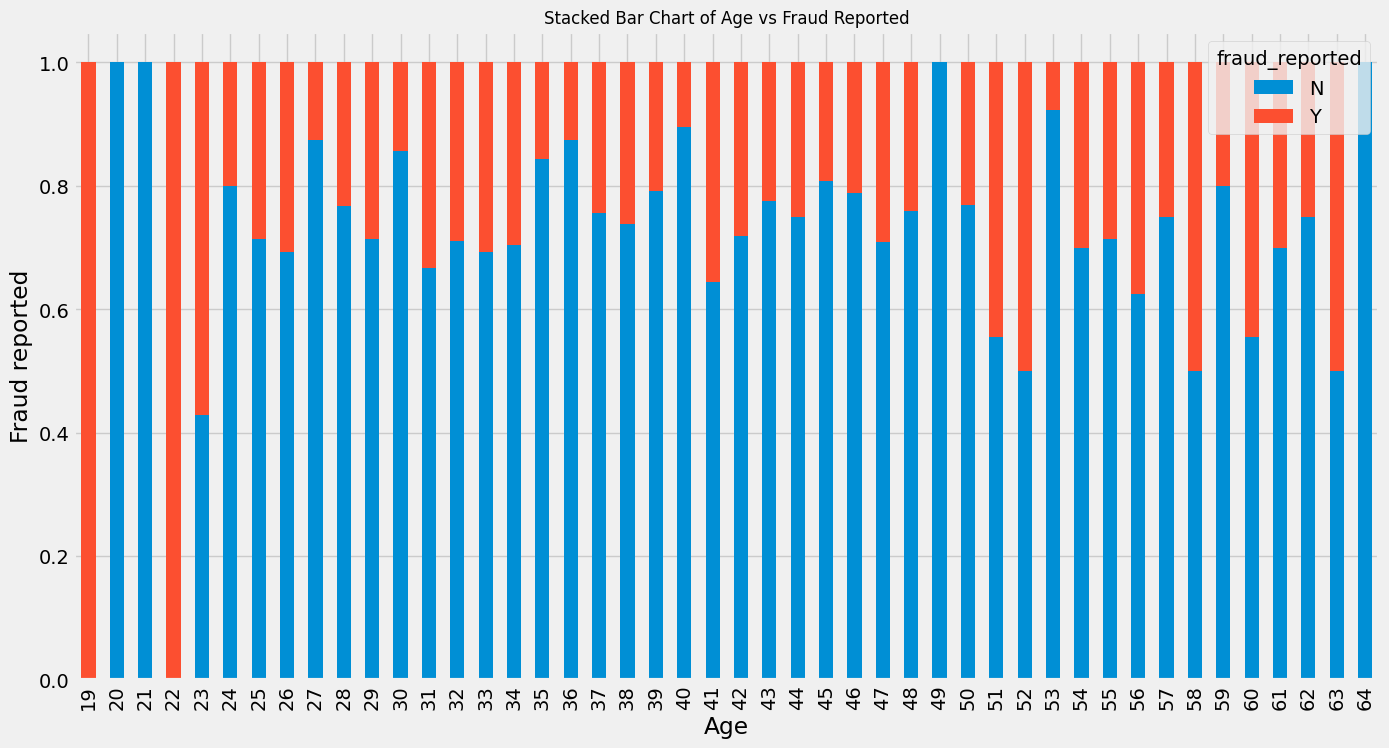

In [14]:
##Lets check age vs fraud reported
plt.rcParams['figure.figsize'] = [15, 8]
fig = plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud reported')
plt.show()

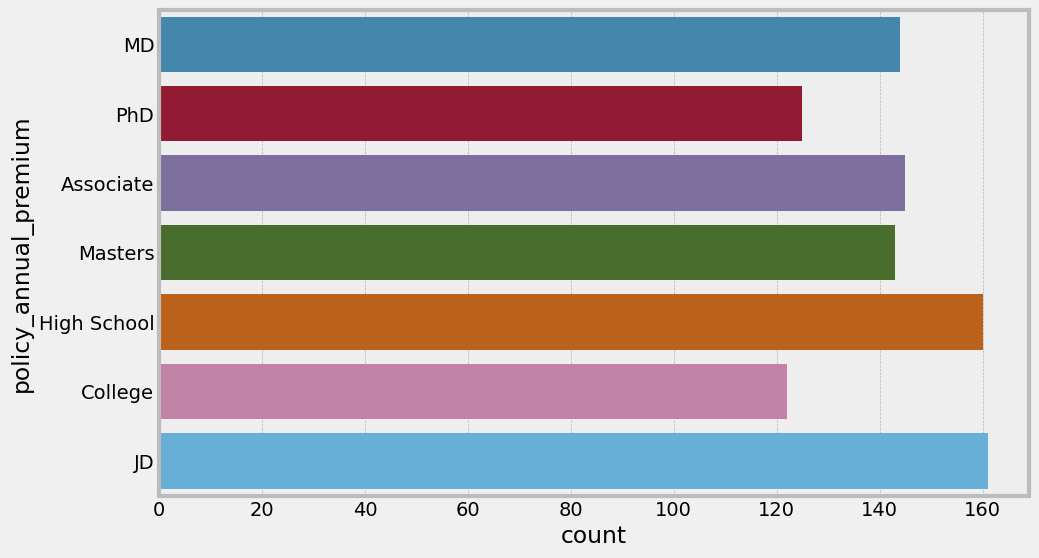

In [15]:
###From above plot we can see that age is an important factor and age 19-23 and 51 - 63 has highest fraud reports
##Now lets check average claim by insured education level
plt.style.use("bmh")
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

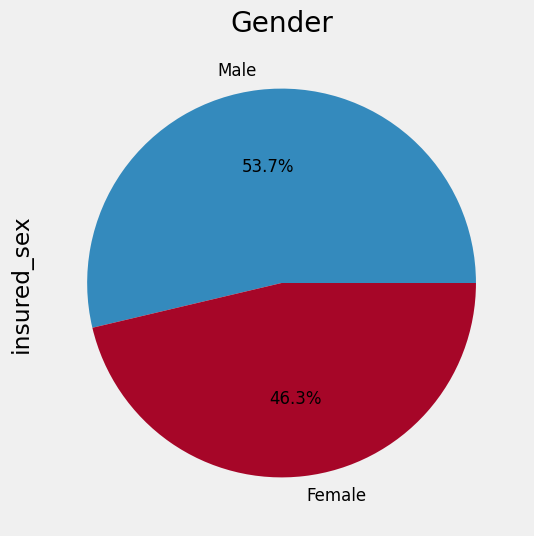

In [16]:
##Lets check for gender wise
plt.style.use('bmh')
plt.figure(figsize=(10,6))
fig = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
fig.set_title('Gender')
plt.show()

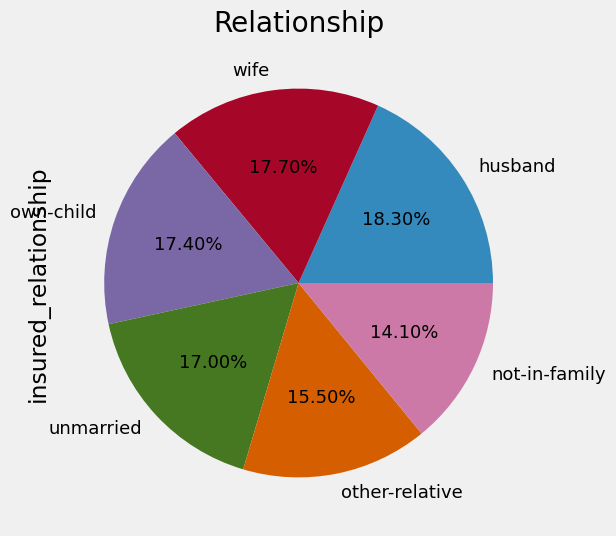

In [17]:
#Let's check with insured relationsip
plt.style.use('bmh')
plt.figure(figsize=(10,6))
fig = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.2f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=13)                                                                           
fig.set_title('Relationship')
plt.show()

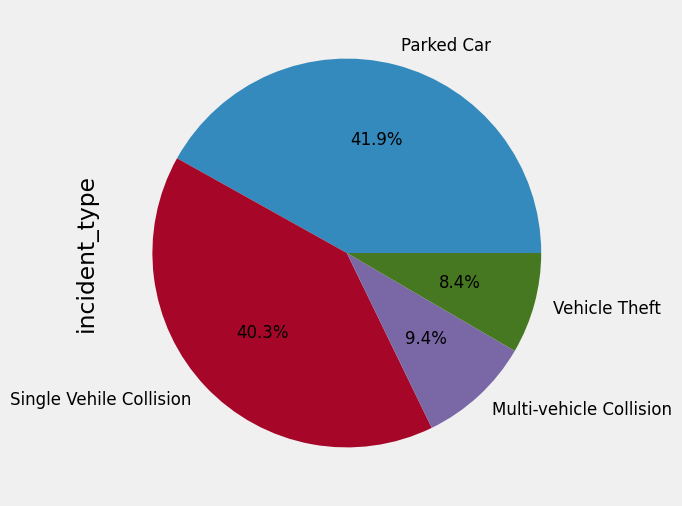

In [18]:
###Incident type
plt.style.use('bmh')
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

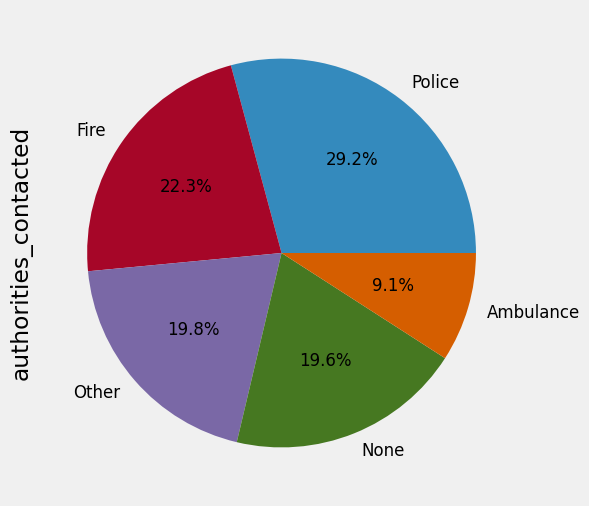

In [19]:
###Authorities contacted
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

In [20]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [21]:
### DATA PRE PROCESSING ####
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [22]:
### There are some NaN values in Police report available, filling those by comparing witnesses
df.loc[df['witnesses']==0,'police_report_available'].value_counts()


NO     89
YES    67
Name: police_report_available, dtype: int64

In [23]:
###Lets check mode
df.loc[df['witnesses']==0,'police_report_available'].mode()[0] ##NO
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace = True)

In [24]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [25]:
df.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,NaN,2,NaN,NaN,NaN,NaN,14,39,NaN,NaN
top,NaN,NaN,NaN,2006-01-01,OH,250/500,NaN,NaN,NaN,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,Saab,RAM,NaN,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,NaN,686,NaN,NaN,NaN,NaN,80,43,NaN,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,0.431483
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,0.000000


<Figure size 1000x600 with 0 Axes>

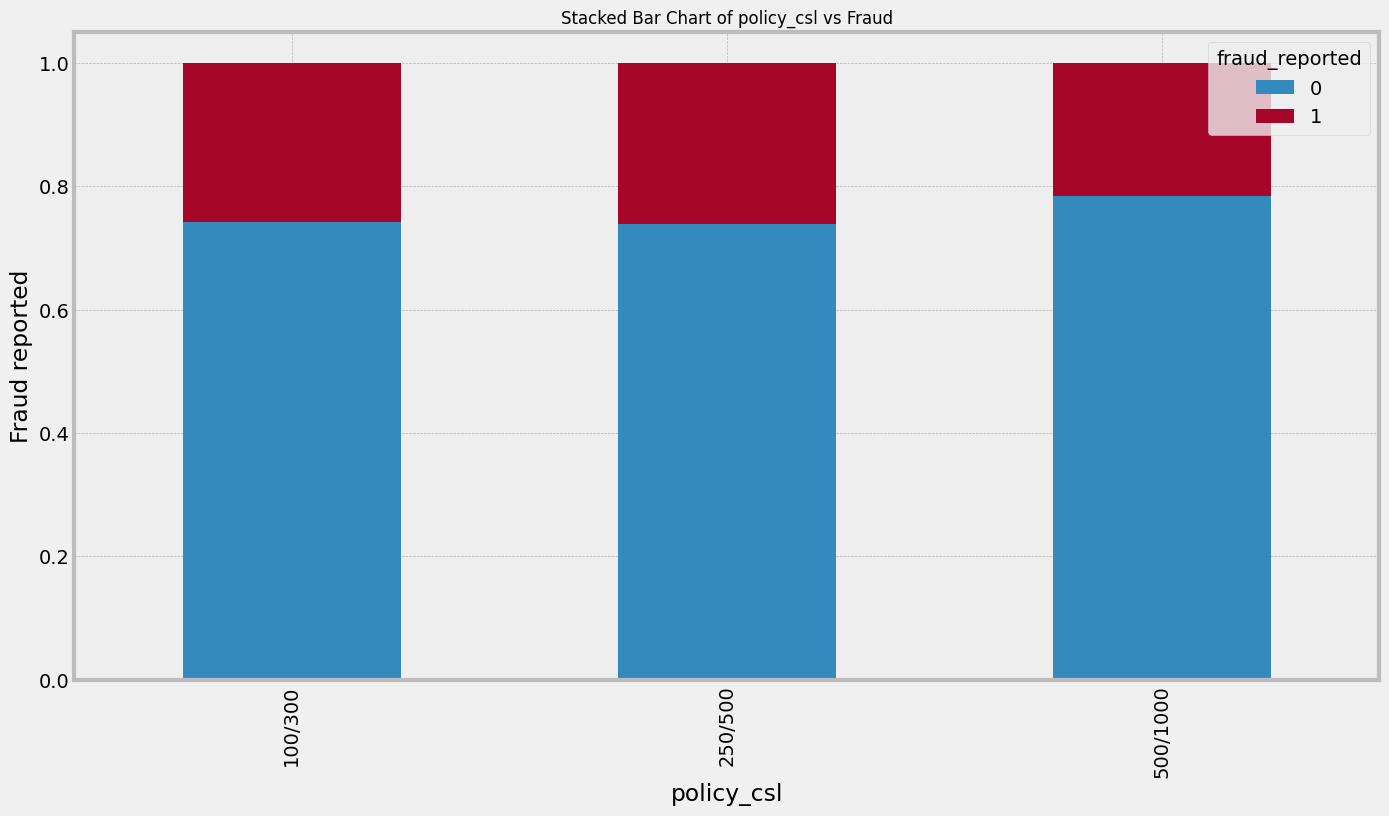

In [26]:
plt.style.use('bmh')
fig = plt.figure(figsize=(10,6))
table=pd.crosstab(df.policy_csl, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of policy_csl vs Fraud', fontsize=12)
plt.xlabel('policy_csl')
plt.ylabel('Fraud reported')
plt.show()

In [27]:
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [28]:
df['csl_per_person'].head()

0    250
1    250
2    100
3    250
4    500
Name: csl_per_person, dtype: object

In [29]:
df['csl_per_accident'].head()

0     500
1     500
2     300
3     500
4    1000
Name: csl_per_accident, dtype: object

In [30]:
df.auto_year.value_counts()  # check the spread of years to decide on further action.

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [31]:
##Let's do some feature engineering by determining the vehicle age
df['vehicle_age'] = 2018 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [32]:
#Binning the incident hour

df['incident_hour_of_the_day_cut']=pd.cut(df['incident_hour_of_the_day'],
                               bins=[0,6,11,13,17,20,24], 
                               labels=['Early Morning (0AM - 06AM)','Morning (06AM - 11AM)',
                                       'Noon (11AM - 01PM)','After Noon (01PM - 05PM)','Evening (05PM - 08PM)',
                                       'Night (08PM - 12PM)'])

In [33]:
df[['incident_hour_of_the_day', 'incident_hour_of_the_day_cut']].head(10)

,incident_hour_of_the_day,incident_hour_of_the_day_cut
0,5,Early Morning (0AM - 06AM)
1,8,Morning (06AM - 11AM)
2,7,Morning (06AM - 11AM)
3,5,Early Morning (0AM - 06AM)
4,20,Evening (05PM - 08PM)
5,19,Evening (05PM - 08PM)
6,0,NaN
7,23,Night (08PM - 12PM)
8,21,Night (08PM - 12PM)
9,14,After Noon (01PM - 05PM)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   months_as_customer            1000 non-null   int64   
 1   age                           1000 non-null   int64   
 2   policy_number                 1000 non-null   int64   
 3   policy_bind_date              1000 non-null   object  
 4   policy_state                  1000 non-null   object  
 5   policy_csl                    1000 non-null   object  
 6   policy_deductable             1000 non-null   int64   
 7   policy_annual_premium         1000 non-null   float64 
 8   umbrella_limit                1000 non-null   int64   
 9   insured_zip                   1000 non-null   int64   
 10  insured_sex                   1000 non-null   object  
 11  insured_education_level       1000 non-null   object  
 12  insured_occupation            1000 non-null   obj

In [35]:
df.collision_type.head(10)

0     Side Collision
1                NaN
2     Rear Collision
3    Front Collision
4                NaN
5     Rear Collision
6    Front Collision
7    Front Collision
8    Front Collision
9     Rear Collision
Name: collision_type, dtype: object

In [36]:
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace = True)
df['incident_hour_of_the_day'].fillna(df['incident_hour_of_the_day'].mode()[0],inplace = True)
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   months_as_customer            1000 non-null   int64   
 1   age                           1000 non-null   int64   
 2   policy_number                 1000 non-null   int64   
 3   policy_bind_date              1000 non-null   object  
 4   policy_state                  1000 non-null   object  
 5   policy_csl                    1000 non-null   object  
 6   policy_deductable             1000 non-null   int64   
 7   policy_annual_premium         1000 non-null   float64 
 8   umbrella_limit                1000 non-null   int64   
 9   insured_zip                   1000 non-null   int64   
 10  insured_sex                   1000 non-null   object  
 11  insured_education_level       1000 non-null   object  
 12  insured_occupation            1000 non-null   obj

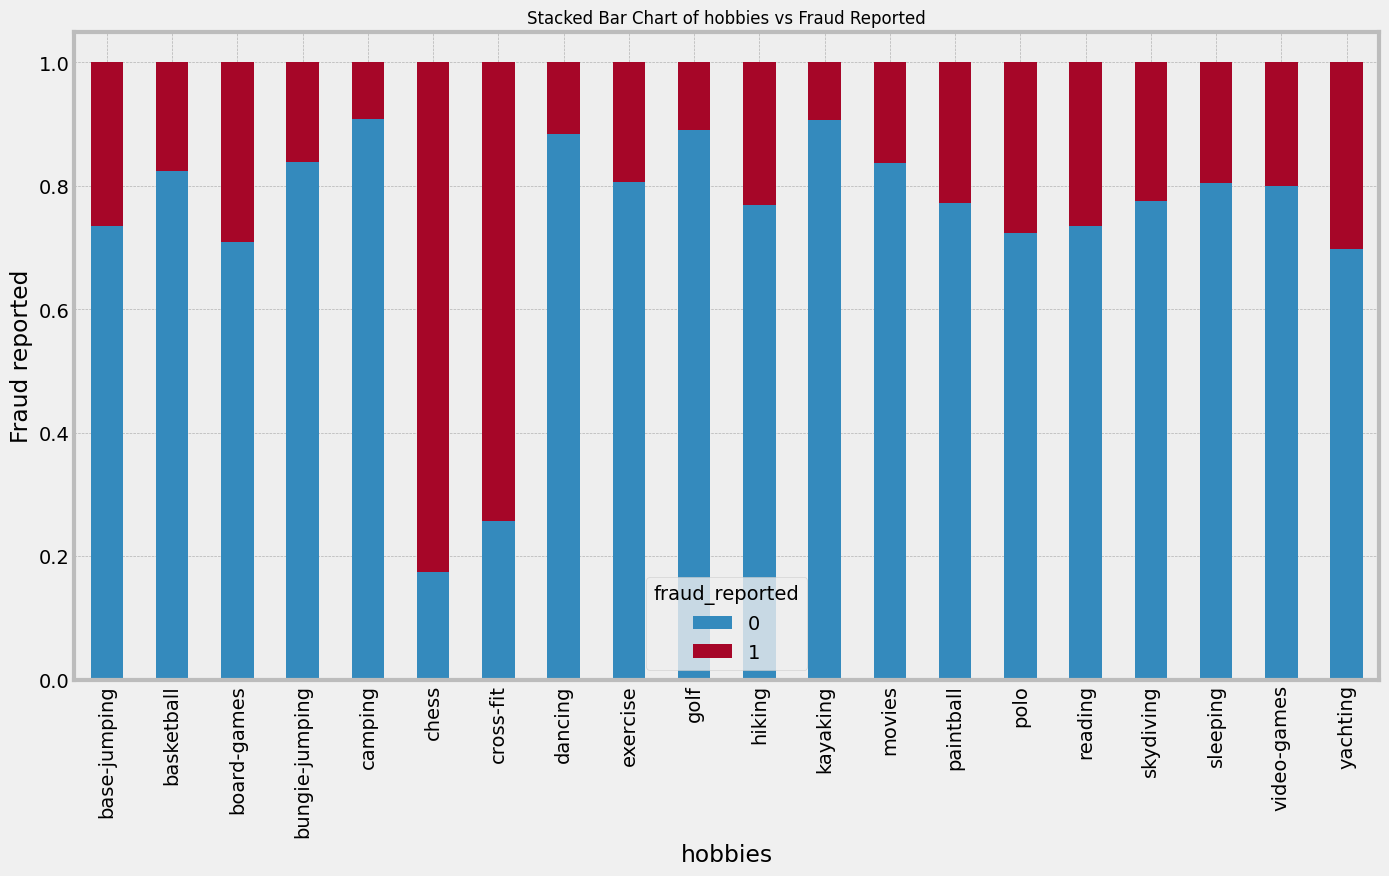

In [38]:
##Lets hobbies vs fraud reported
plt.rcParams['figure.figsize'] = [15, 8]
fig = plt.style.use('bmh')
table=pd.crosstab(df.insured_hobbies, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of hobbies vs Fraud Reported', fontsize=12)
plt.xlabel('hobbies')
plt.ylabel('Fraud reported')
plt.show()

In [39]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_hour_of_the_day_cut
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,1,250,500,14,Early Morning (0AM - 06AM)
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,1,250,500,11,Morning (06AM - 11AM)
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,0,100,300,11,Morning (06AM - 11AM)
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,1,250,500,4,Early Morning (0AM - 06AM)
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,0,500,1000,9,Evening (05PM - 08PM)


In [40]:
#The above graph does not give much information and seems random so 
###Let's drop unimportant columns like policy_number, insured_hobbies
df = df.drop(columns = ['policy_number','insured_hobbies'])


In [41]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [42]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_hour_of_the_day_cut
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,13020,52080,Saab,92x,2004,1,250,500,14,Early Morning (0AM - 06AM)
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,3510,Mercedes,E400,2007,1,250,500,11,Morning (06AM - 11AM)
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3850,23100,Dodge,RAM,2007,0,100,300,11,Morning (06AM - 11AM)
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,50720,Chevrolet,Tahoe,2014,1,250,500,4,Early Morning (0AM - 06AM)
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,650,4550,Accura,RSX,2009,0,500,1000,9,Evening (05PM - 08PM)


In [43]:
###We can also include number of days as a customer as loyalty of a customer might play an important role in fraud detection
##We can do this by subtracting incident date and policy bind date
df['incident_policy_days'] = (df['incident_date'] - df['policy_bind_date']).dt.days

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   months_as_customer            1000 non-null   int64         
 1   age                           1000 non-null   int64         
 2   policy_bind_date              1000 non-null   datetime64[ns]
 3   policy_state                  1000 non-null   object        
 4   policy_csl                    1000 non-null   object        
 5   policy_deductable             1000 non-null   int64         
 6   policy_annual_premium         1000 non-null   float64       
 7   umbrella_limit                1000 non-null   int64         
 8   insured_zip                   1000 non-null   int64         
 9   insured_sex                   1000 non-null   object        
 10  insured_education_level       1000 non-null   object        
 11  insured_occupation            1

In [45]:
df.head(10)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_hour_of_the_day_cut,incident_policy_days
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,1,250,500,14,Early Morning (0AM - 06AM),100
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,1,250,500,11,Morning (06AM - 11AM),3130
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,0,100,300,11,Morning (06AM - 11AM),5282
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,1,250,500,4,Early Morning (0AM - 06AM),8996
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,0,500,1000,9,Evening (05PM - 08PM),256
5,256,39,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,...,51280,Saab,95,2003,1,250,500,15,Evening (05PM - 08PM),3004
6,137,34,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,...,50050,Nissan,Pathfinder,2012,0,250,500,6,NaN,5336
7,165,37,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,...,32830,Audi,A5,2015,0,100,300,3,Night (08PM - 12PM),9155
8,27,33,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,...,22160,Toyota,Camry,2012,0,100,300,6,Night (08PM - 12PM),6568
9,212,42,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,...,32900,Saab,92x,1996,0,100,300,22,After Noon (01PM - 05PM),1260


In [46]:
df['incident_policy_days'].agg(['min', 'max'])

min     -20
max    9172
Name: incident_policy_days, dtype: int64

In [47]:
df.head(10)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_hour_of_the_day_cut,incident_policy_days
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,1,250,500,14,Early Morning (0AM - 06AM),100
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,1,250,500,11,Morning (06AM - 11AM),3130
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,0,100,300,11,Morning (06AM - 11AM),5282
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,1,250,500,4,Early Morning (0AM - 06AM),8996
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,0,500,1000,9,Evening (05PM - 08PM),256
5,256,39,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,...,51280,Saab,95,2003,1,250,500,15,Evening (05PM - 08PM),3004
6,137,34,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,...,50050,Nissan,Pathfinder,2012,0,250,500,6,NaN,5336
7,165,37,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,...,32830,Audi,A5,2015,0,100,300,3,Night (08PM - 12PM),9155
8,27,33,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,...,22160,Toyota,Camry,2012,0,100,300,6,Night (08PM - 12PM),6568
9,212,42,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,...,32900,Saab,92x,1996,0,100,300,22,After Noon (01PM - 05PM),1260


In [48]:
pd.cut(df['incident_policy_days'], 5)

0      (-29.192, 1818.4]
1       (1818.4, 3656.8]
2       (3656.8, 5495.2]
3       (7333.6, 9172.0]
4      (-29.192, 1818.4]
             ...        
995     (7333.6, 9172.0]
996    (-29.192, 1818.4]
997     (3656.8, 5495.2]
998    (-29.192, 1818.4]
999     (5495.2, 7333.6]
Name: incident_policy_days, Length: 1000, dtype: category
Categories (5, interval[float64, right]): [(-29.192, 1818.4] < (1818.4, 3656.8] < (3656.8, 5495.2] < (5495.2, 7333.6] < (7333.6, 9172.0]]

In [49]:
pd.cut(df['vehicle_age'], 5)

0      (11.0, 15.0]
1       (7.0, 11.0]
2       (7.0, 11.0]
3       (2.98, 7.0]
4       (7.0, 11.0]
           ...     
995    (11.0, 15.0]
996     (2.98, 7.0]
997    (19.0, 23.0]
998    (19.0, 23.0]
999     (7.0, 11.0]
Name: vehicle_age, Length: 1000, dtype: category
Categories (5, interval[float64, right]): [(2.98, 7.0] < (7.0, 11.0] < (11.0, 15.0] < (15.0, 19.0] < (19.0, 23.0]]

In [50]:
df.head()


,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_hour_of_the_day_cut,incident_policy_days
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,1,250,500,14,Early Morning (0AM - 06AM),100
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,1,250,500,11,Morning (06AM - 11AM),3130
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,0,100,300,11,Morning (06AM - 11AM),5282
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,1,250,500,4,Early Morning (0AM - 06AM),8996
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,0,500,1000,9,Evening (05PM - 08PM),256


In [51]:
bins = [0, 3, 7, 11, 15, 19,23]
labels = [0,1,2,3,4,5]
df['vehicle_age_cut'] = pd.cut(df['vehicle_age'], bins=bins, labels=labels)
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_hour_of_the_day_cut,incident_policy_days,vehicle_age_cut
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,1,250,500,14,Early Morning (0AM - 06AM),100,3
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,1,250,500,11,Morning (06AM - 11AM),3130,2
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,0,100,300,11,Morning (06AM - 11AM),5282,2
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,1,250,500,4,Early Morning (0AM - 06AM),8996,1
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,0,500,1000,9,Evening (05PM - 08PM),256,2


In [52]:
bins = [0, 1900, 3700, 5500, 7400, 9200]
labels = [0,1,2,3,4]
df['incident_policy_days_cut'] = pd.cut(df['incident_policy_days'], bins=bins, labels=labels)
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_hour_of_the_day_cut,incident_policy_days,vehicle_age_cut,incident_policy_days_cut
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,92x,2004,1,250,500,14,Early Morning (0AM - 06AM),100,3,0
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,E400,2007,1,250,500,11,Morning (06AM - 11AM),3130,2,1
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,RAM,2007,0,100,300,11,Morning (06AM - 11AM),5282,2,2
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Tahoe,2014,1,250,500,4,Early Morning (0AM - 06AM),8996,1,4
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,RSX,2009,0,500,1000,9,Evening (05PM - 08PM),256,2,0


In [53]:
##For months as customer
pd.cut(df['months_as_customer'], 5)

0      (287.4, 383.2]
1      (191.6, 287.4]
2       (95.8, 191.6]
3      (191.6, 287.4]
4      (191.6, 287.4]
            ...      
995    (-0.479, 95.8]
996    (191.6, 287.4]
997     (95.8, 191.6]
998    (383.2, 479.0]
999    (383.2, 479.0]
Name: months_as_customer, Length: 1000, dtype: category
Categories (5, interval[float64, right]): [(-0.479, 95.8] < (95.8, 191.6] < (191.6, 287.4] < (287.4, 383.2] < (383.2, 479.0]]

In [54]:
bins = [0, 100, 200, 300, 400, 500]
labels = [0,1,2,3,4]
df['months_as_customer_cut'] = pd.cut(df['months_as_customer'], bins=bins, labels=labels)
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_year,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_hour_of_the_day_cut,incident_policy_days,vehicle_age_cut,incident_policy_days_cut,months_as_customer_cut
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,2004,1,250,500,14,Early Morning (0AM - 06AM),100,3,0,3
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,2007,1,250,500,11,Morning (06AM - 11AM),3130,2,1,2
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,2007,0,100,300,11,Morning (06AM - 11AM),5282,2,2,1
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2014,1,250,500,4,Early Morning (0AM - 06AM),8996,1,4,2
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,2009,0,500,1000,9,Evening (05PM - 08PM),256,2,0,2


In [55]:
##Lets drop incident policy days and vehicle age now as we have already binned that
df.drop('incident_policy_days',axis=1,inplace=True)
df.drop('vehicle_age',axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,incident_hour_of_the_day_cut,vehicle_age_cut,incident_policy_days_cut,months_as_customer_cut
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,1,250,500,Early Morning (0AM - 06AM),3,0,3
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,1,250,500,Morning (06AM - 11AM),2,1,2
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,0,100,300,Morning (06AM - 11AM),2,2,1
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,1,250,500,Early Morning (0AM - 06AM),1,4,2
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,0,500,1000,Evening (05PM - 08PM),2,0,2


In [56]:
#Let's drop months as customer also
df.drop('months_as_customer',axis=1,inplace=True)
df.head()

,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,incident_hour_of_the_day_cut,vehicle_age_cut,incident_policy_days_cut,months_as_customer_cut
0,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Saab,92x,2004,1,250,500,Early Morning (0AM - 06AM),3,0,3
1,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Mercedes,E400,2007,1,250,500,Morning (06AM - 11AM),2,1,2
2,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Dodge,RAM,2007,0,100,300,Morning (06AM - 11AM),2,2,1
3,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Chevrolet,Tahoe,2014,1,250,500,Early Morning (0AM - 06AM),1,4,2
4,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,Accura,RSX,2009,0,500,1000,Evening (05PM - 08PM),2,0,2


In [57]:
#We can also create an age band
pd.cut(df['age'], 5)

0      (46.0, 55.0]
1      (37.0, 46.0]
2      (28.0, 37.0]
3      (37.0, 46.0]
4      (37.0, 46.0]
           ...     
995    (37.0, 46.0]
996    (37.0, 46.0]
997    (28.0, 37.0]
998    (55.0, 64.0]
999    (55.0, 64.0]
Name: age, Length: 1000, dtype: category
Categories (5, interval[float64, right]): [(18.955, 28.0] < (28.0, 37.0] < (37.0, 46.0] < (46.0, 55.0] < (55.0, 64.0]]

In [58]:
bins = [0, 28, 40, 50, 55, 65]
labels = [0,1,2,3,4]
df['age_cut'] = pd.cut(df['age'], bins=bins, labels=labels)
df.head()

,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,incident_hour_of_the_day_cut,vehicle_age_cut,incident_policy_days_cut,months_as_customer_cut,age_cut
0,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,92x,2004,1,250,500,Early Morning (0AM - 06AM),3,0,3,2
1,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,E400,2007,1,250,500,Morning (06AM - 11AM),2,1,2,2
2,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,RAM,2007,0,100,300,Morning (06AM - 11AM),2,2,1,1
3,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Tahoe,2014,1,250,500,Early Morning (0AM - 06AM),1,4,2,2
4,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,RSX,2009,0,500,1000,Evening (05PM - 08PM),2,0,2,2


In [59]:
##We can now drop age column also
df.drop('age',axis=1,inplace=True)
df.head()

,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,incident_hour_of_the_day_cut,vehicle_age_cut,incident_policy_days_cut,months_as_customer_cut,age_cut
0,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,...,92x,2004,1,250,500,Early Morning (0AM - 06AM),3,0,3,2
1,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,...,E400,2007,1,250,500,Morning (06AM - 11AM),2,1,2,2
2,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,...,RAM,2007,0,100,300,Morning (06AM - 11AM),2,2,1,1
3,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,...,Tahoe,2014,1,250,500,Early Morning (0AM - 06AM),1,4,2,2
4,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,...,RSX,2009,0,500,1000,Evening (05PM - 08PM),2,0,2,2


In [60]:
###Let's use label encoder to convert categorical columns to numerical columns
import sklearn.preprocessing as pre
cat=df.select_dtypes(exclude=['int','float']).columns.to_list()
cat

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'csl_per_person',
 'csl_per_accident',
 'incident_hour_of_the_day_cut',
 'vehicle_age_cut',
 'incident_policy_days_cut',
 'months_as_customer_cut',
 'age_cut']

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   policy_bind_date              1000 non-null   datetime64[ns]
 1   policy_state                  1000 non-null   object        
 2   policy_csl                    1000 non-null   object        
 3   policy_deductable             1000 non-null   int64         
 4   policy_annual_premium         1000 non-null   float64       
 5   umbrella_limit                1000 non-null   int64         
 6   insured_zip                   1000 non-null   int64         
 7   insured_sex                   1000 non-null   object        
 8   insured_education_level       1000 non-null   object        
 9   insured_occupation            1000 non-null   object        
 10  insured_relationship          1000 non-null   object        
 11  capital-gains                 1

In [62]:
label = pre.LabelEncoder()

In [63]:
for i in cat:
    df[i]=label.fit_transform(df[i])
df.head()

,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,incident_hour_of_the_day_cut,vehicle_age_cut,incident_policy_days_cut,months_as_customer_cut,age_cut
0,940,2,1,1000,1406.91,0,466132,1,4,2,...,1,2004,1,1,2,1,3,0,3,2
1,635,1,1,2000,1197.22,5000000,468176,1,4,6,...,12,2007,1,1,2,3,2,1,2,2
2,413,2,0,2000,1413.14,5000000,430632,0,6,11,...,30,2007,0,0,1,3,2,2,1,1
3,19,0,1,2000,1415.74,6000000,608117,0,6,1,...,34,2014,1,1,2,1,1,4,2,2
4,922,0,2,1000,1583.91,6000000,610706,1,0,11,...,31,2009,0,2,0,2,2,0,2,2


In [64]:
##Let's drop insured_zip, policy annual premium, policy bind da
df = df.drop(columns=['insured_zip','policy_annual_premium'])
df.head()

,policy_bind_date,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,incident_hour_of_the_day_cut,vehicle_age_cut,incident_policy_days_cut,months_as_customer_cut,age_cut
0,940,2,1,1000,0,1,4,2,0,53300,...,1,2004,1,1,2,1,3,0,3,2
1,635,1,1,2000,5000000,1,4,6,2,0,...,12,2007,1,1,2,3,2,1,2,2
2,413,2,0,2000,5000000,0,6,11,3,35100,...,30,2007,0,0,1,3,2,2,1,1
3,19,0,1,2000,6000000,0,6,1,4,48900,...,34,2014,1,1,2,1,1,4,2,2
4,922,0,2,1000,6000000,1,0,11,4,66000,...,31,2009,0,2,0,2,2,0,2,2


In [65]:
# We can now also drop other columns which are not important to training

df = df.drop(columns = [
    'policy_bind_date', 
    'incident_date', 
    'auto_year', 
    'incident_hour_of_the_day'])
df.head()

,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,incident_hour_of_the_day_cut,vehicle_age_cut,incident_policy_days_cut,months_as_customer_cut,age_cut
0,2,1,1000,0,1,4,2,0,53300,0,...,10,1,1,1,2,1,3,0,3,2
1,1,1,2000,5000000,1,4,6,2,0,0,...,8,12,1,1,2,3,2,1,2,2
2,2,0,2000,5000000,0,6,11,3,35100,0,...,4,30,0,0,1,3,2,2,1,1
3,0,1,2000,6000000,0,6,1,4,48900,-62400,...,3,34,1,1,2,1,1,4,2,2
4,0,2,1000,6000000,1,0,11,4,66000,-46000,...,0,31,0,2,0,2,2,0,2,2


In [66]:
###DATA NORMALIZATION###
df_ML=df.drop('fraud_reported',axis = 1)
df_test = pre.minmax_scale(df_ML.values)
df_Norm = df_ML
df_Norm.head()

,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,vehicle_claim,auto_make,auto_model,csl_per_person,csl_per_accident,incident_hour_of_the_day_cut,vehicle_age_cut,incident_policy_days_cut,months_as_customer_cut,age_cut
0,2,1,1000,0,1,4,2,0,53300,0,...,52080,10,1,1,2,1,3,0,3,2
1,1,1,2000,5000000,1,4,6,2,0,0,...,3510,8,12,1,2,3,2,1,2,2
2,2,0,2000,5000000,0,6,11,3,35100,0,...,23100,4,30,0,1,3,2,2,1,1
3,0,1,2000,6000000,0,6,1,4,48900,-62400,...,50720,3,34,1,2,1,1,4,2,2
4,0,2,1000,6000000,1,0,11,4,66000,-46000,...,4550,0,31,2,0,2,2,0,2,2


In [67]:
fraud_reported = df['fraud_reported']
df_Norm = df_Norm.join(fraud_reported)
df_Norm

,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,auto_make,auto_model,csl_per_person,csl_per_accident,incident_hour_of_the_day_cut,vehicle_age_cut,incident_policy_days_cut,months_as_customer_cut,age_cut,fraud_reported
0,2,1,1000,0,1,4,2,0,53300,0,...,10,1,1,2,1,3,0,3,2,1
1,1,1,2000,5000000,1,4,6,2,0,0,...,8,12,1,2,3,2,1,2,2,1
2,2,0,2000,5000000,0,6,11,3,35100,0,...,4,30,0,1,3,2,2,1,1,0
3,0,1,2000,6000000,0,6,1,4,48900,-62400,...,3,34,1,2,1,1,4,2,2,1
4,0,2,1000,6000000,1,0,11,4,66000,-46000,...,0,31,2,0,2,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,1000,0,0,5,2,4,0,0,...,6,6,2,0,2,3,4,0,1,0
996,0,0,1000,0,0,6,9,5,70900,0,...,13,28,0,1,4,0,0,2,2,0
997,2,1,500,3000000,0,5,1,2,35100,0,...,11,19,1,2,1,5,2,1,1,0
998,0,2,2000,5000000,1,0,5,5,0,0,...,1,5,2,0,1,5,0,4,4,0


In [72]:
####FEATURE SELECTION####
import sklearn.model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score, f1_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
def features_train_score_DT(data,list_columns_drop):
    x_scale = data.drop('fraud_reported',axis = 1)
    Y = data['fraud_reported']
    x_train,x_test,y_train,y_test = ms.train_test_split(x_scale,Y,
                                                    test_size = 0.3,
                                                    random_state =11121)
    
    model_DT = DecisionTreeClassifier()
    model_DT.fit(x_train,y_train)
    importance = model_DT.feature_importances_
    #for i,v in enumerate(importance):
       # print('Feature: %0d, Score: %.5f' % (i,v))
    
    ar = dict(zip(data.columns,importance))
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    
    return ar


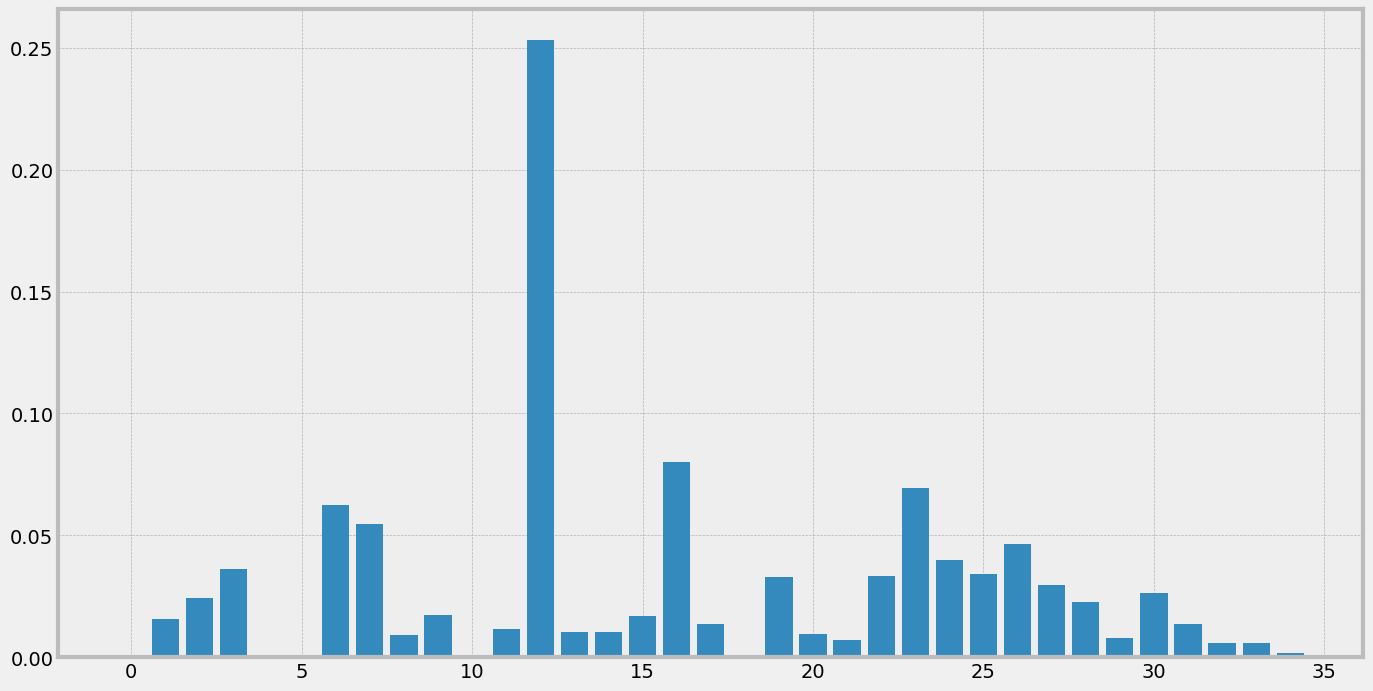

{'policy_state': 0.0,
 'policy_csl': 0.015531898429122582,
 'policy_deductable': 0.02407522206547179,
 'umbrella_limit': 0.03616434152361687,
 'insured_sex': 0.0,
 'insured_education_level': 0.0,
 'insured_occupation': 0.06230464253497408,
 'insured_relationship': 0.05466156192877807,
 'capital-gains': 0.009170888708265977,
 'capital-loss': 0.017149574208573326,
 'incident_type': 0.0,
 'collision_type': 0.011400192352336419,
 'incident_severity': 0.25317953643275076,
 'authorities_contacted': 0.010386280196831755,
 'incident_state': 0.01031774984615498,
 'incident_city': 0.016760201982236284,
 'incident_location': 0.08005253958558779,
 'number_of_vehicles_involved': 0.013547729267538671,
 'property_damage': 0.0,
 'bodily_injuries': 0.032872654473080534,
 'witnesses': 0.009353555831734493,
 'police_report_available': 0.006878499897436655,
 'total_claim_amount': 0.03317763502000365,
 'injury_claim': 0.06947533444667567,
 'property_claim': 0.03993145531692206,
 'vehicle_claim': 0.03400354

In [73]:
features_train_score_DT(df_Norm,['fraud_reported'])

In [74]:
dfcolumns = df.columns.to_list()

In [75]:
dfcolumns

['policy_state',
 'policy_csl',
 'policy_deductable',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'fraud_reported',
 'csl_per_person',
 'csl_per_accident',
 'incident_hour_of_the_day_cut',
 'vehicle_age_cut',
 'incident_policy_days_cut',
 'months_as_customer_cut',
 'age_cut']

In [146]:
Features_selected = ['months_as_customer_cut', 'age_cut', 'insured_occupation', 'incident_policy_days_cut', 'incident_severity', 'police_report_available',
                     'incident_state', 'injury_claim', 'auto_make', 'auto_model','incident_hour_of_the_day_cut','vehicle_age_cut', 'number_of_vehicles_involved', 'witnesses']


In [147]:
df_features = df_Norm[Features_selected]

df_outcome = df_Norm['fraud_reported']

In [148]:
###SMOTE (Synthetic Minority Oversampling Technique) for data balancing
from imblearn.over_sampling import SMOTE

In [149]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df_features, df_outcome)

print('Original dataset shape', df_features.shape,df_outcome.shape)
print('Resample dataset shape', x_smote.shape,y_smote.shape)

Original dataset shape (1000, 14) (1000,)
Resample dataset shape (1506, 14) (1506,)


In [151]:
x_train,x_test,y_train,y_test = ms.train_test_split(x_smote,y_smote,
                                                    test_size = 0.3,
                                                    random_state =8)
print('length of X_train and X_test: ', len(x_train), len(x_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  1054 452
length of y_train and y_test:  1054 452


In [152]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape


((452, 14), (1054, 14), (452,), (1054,))

In [153]:
y_test.value_counts()


0    249
1    203
Name: fraud_reported, dtype: int64

In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score, f1_score, log_loss

dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
dtc.get_params
dtc.fit(x_train, y_train)
y_pred_DT = dtc.predict(x_test)
Acc_DT = accuracy_score(y_test,y_pred_DT)
print(Acc_DT)
f1 = f1_score(y_test,y_pred_DT)
f1

0.8097345132743363


0.7912621359223301

In [155]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_RF=rfc.predict(x_test)
Acc_RF=accuracy_score(y_test,y_pred_RF)
print(Acc_RF)
f1 = f1_score(y_test,y_pred_RF)
f1

0.8650442477876106


0.8471177944862155

AUC: 0.862


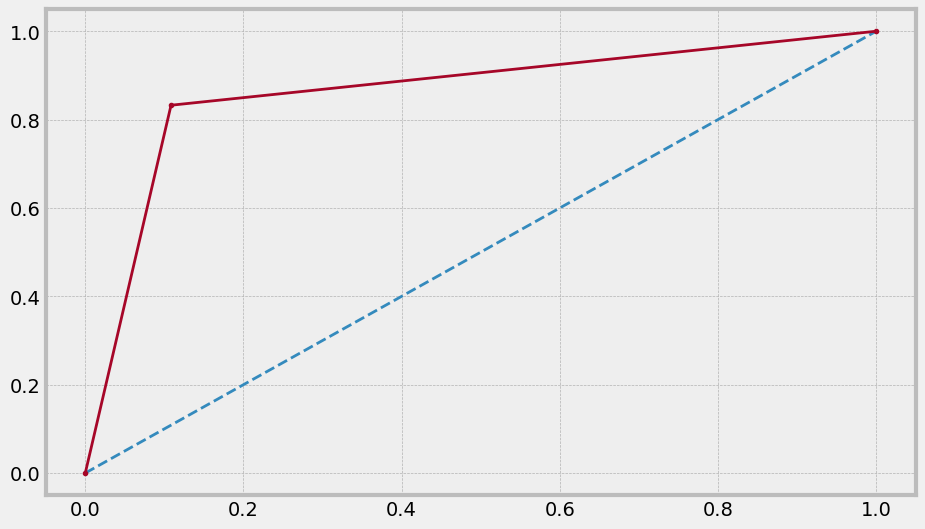

In [170]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
auc = roc_auc_score(y_test, y_pred_RF)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)

# plot no skill
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [156]:
from sklearn import svm
sv=svm.SVC(kernel = 'rbf', probability = True)
sv.fit(x_train,y_train)
y_pred_SVM=sv.predict(x_test)
Acc_SVM=accuracy_score(y_test,y_pred_SVM)
print(Acc_SVM)
f1 = f1_score(y_test,y_pred_SVM)
f1

0.5331858407079646


0.6291739894551844

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Baseline Random forest based Model
rfc = RandomForestClassifier(n_estimators=200)
    
kfold = KFold(n_splits=7)
result2 = cross_val_score(rfc, x_train, y_train, cv=kfold, scoring='accuracy')
print(result2.mean())

0.8425039419741406


In [159]:
print("Accuracy: %0.2f (+/- %0.2f)" % (result2.mean(), result2.std() * 2))

Accuracy: 0.84 (+/- 0.04)


In [160]:
###Standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
X_train_scaled

array([[0.92252495, 1.07940144, 1.29338633, ..., 2.79871308, 1.03666621,
        0.96240459],
       [1.84504991, 2.15880289, 1.81074086, ..., 1.39935654, 1.03666621,
        0.        ],
       [2.76757486, 2.15880289, 0.51735453, ..., 2.09903481, 1.03666621,
        1.92480917],
       ...,
       [0.        , 0.        , 2.06941812, ..., 0.69967827, 3.10999862,
        0.96240459],
       [1.84504991, 1.07940144, 2.06941812, ..., 3.49839135, 1.03666621,
        1.92480917],
       [0.        , 1.07940144, 3.36280445, ..., 2.09903481, 1.03666621,
        0.        ]])

In [161]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = x_train.columns) # retaining columns names
X_train_scaled.head(2)

,months_as_customer_cut,age_cut,insured_occupation,incident_policy_days_cut,incident_severity,police_report_available,incident_state,injury_claim,auto_make,auto_model,incident_hour_of_the_day_cut,vehicle_age_cut,number_of_vehicles_involved,witnesses
0,0.922525,1.079401,1.293386,1.481331,0.000000,2.357476,2.959651,1.991721,1.318530,1.338084,1.202169,2.798713,1.036666,0.962405
1,1.845050,2.158803,1.810741,0.740665,1.088792,0.000000,2.959651,1.421460,2.900767,1.815971,0.601085,1.399357,1.036666,0.000000


In [162]:
x_train_scaled = pd.DataFrame.to_numpy(X_train_scaled) # converting to array for computational ease
x_train_scaled

array([[0.92252495, 1.07940144, 1.29338633, ..., 2.79871308, 1.03666621,
        0.96240459],
       [1.84504991, 2.15880289, 1.81074086, ..., 1.39935654, 1.03666621,
        0.        ],
       [2.76757486, 2.15880289, 0.51735453, ..., 2.09903481, 1.03666621,
        1.92480917],
       ...,
       [0.        , 0.        , 2.06941812, ..., 0.69967827, 3.10999862,
        0.96240459],
       [1.84504991, 1.07940144, 2.06941812, ..., 3.49839135, 1.03666621,
        1.92480917],
       [0.        , 1.07940144, 3.36280445, ..., 2.09903481, 1.03666621,
        0.        ]])

LR: 0.743810 (0.029889)
XGB: 0.843441 (0.036986)
KNN: 0.736217 (0.034419)
DT: 0.734295 (0.046107)
SVM: 0.797844 (0.025316)
RF: 0.841545 (0.036153)
ADA: 0.796038 (0.033625)
LDA: 0.747610 (0.028973)
GNB: 0.753270 (0.029792)


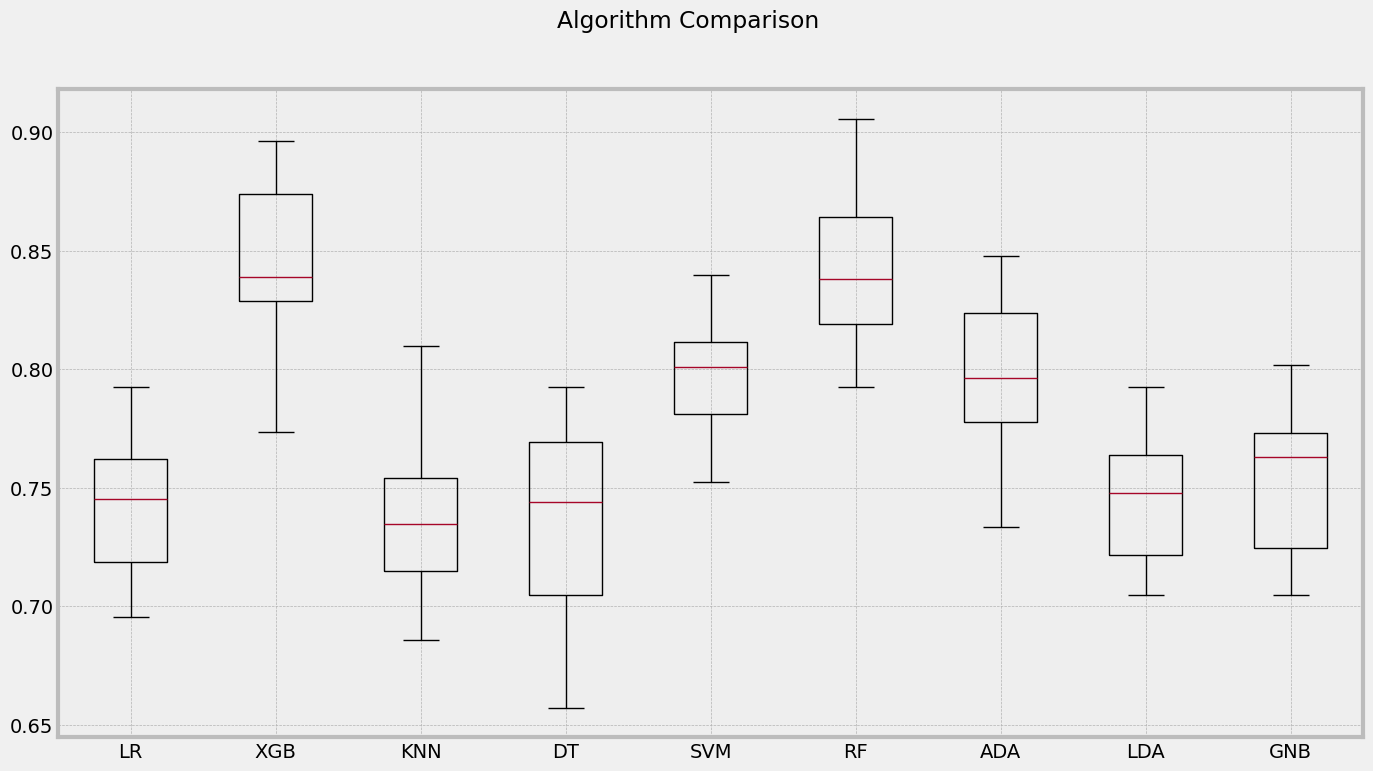

In [163]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=200)))
models.append(('ADA', AdaBoostClassifier(n_estimators=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]              
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [171]:
clf1= LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)
clf1.fit(x_train, y_train)
y_pred_LR=clf1.predict(x_test)
Acc_LR=accuracy_score(y_test,y_pred_LR)
print(Acc_LR)
f1 = f1_score(y_test,y_pred_SVM)
f1

0.7898230088495575


0.6291739894551844

In [164]:
clf1= LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)
clf2 = XGBClassifier() 

clf = [
    ('LR', clf1), 
    ('XGB', clf2)] 
    
#create our voting classifier, inputting our models
eclf= VotingClassifier(estimators=[
    ('LR', clf1), 
    ('XGB', clf2)], voting='hard')

for clf, label in zip([clf1, clf2, eclf], [
    'Logistic Regression', 
    'XGB Classifier',
    'Ensemble']):
    
    scores = cross_val_score(clf, x_train_scaled, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))    

Accuracy: 0.75 (+/- 0.03) [Logistic Regression]
Accuracy: 0.83 (+/- 0.02) [XGB Classifier]
Accuracy: 0.81 (+/- 0.03) [Ensemble]


In [165]:
####XGB grid search
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# fit model on all training data
xgb = XGBClassifier()
xgb.fit(x_train_scaled, y_train)

# make predictions for test data and evaluate
xgb_pred = xgb.predict(X_test_scaled)
predictions = [round(value) for value in xgb_pred]
accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_scaled)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_test_scaled)
    xgb_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in xgb_pred]
    accuracy = accuracy_score(y_test, xgb_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 85.18%
Thresh=0.033, n=14, Accuracy: 85.18%
Thresh=0.039, n=13, Accuracy: 85.84%
Thresh=0.040, n=12, Accuracy: 84.96%
Thresh=0.041, n=11, Accuracy: 85.62%
Thresh=0.043, n=10, Accuracy: 84.29%
Thresh=0.045, n=9, Accuracy: 87.83%
Thresh=0.045, n=8, Accuracy: 84.29%
Thresh=0.046, n=7, Accuracy: 83.19%
Thresh=0.051, n=6, Accuracy: 78.54%
Thresh=0.058, n=5, Accuracy: 81.19%
Thresh=0.058, n=4, Accuracy: 82.52%
Thresh=0.066, n=3, Accuracy: 84.96%
Thresh=0.069, n=2, Accuracy: 84.29%
Thresh=0.366, n=1, Accuracy: 84.29%


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

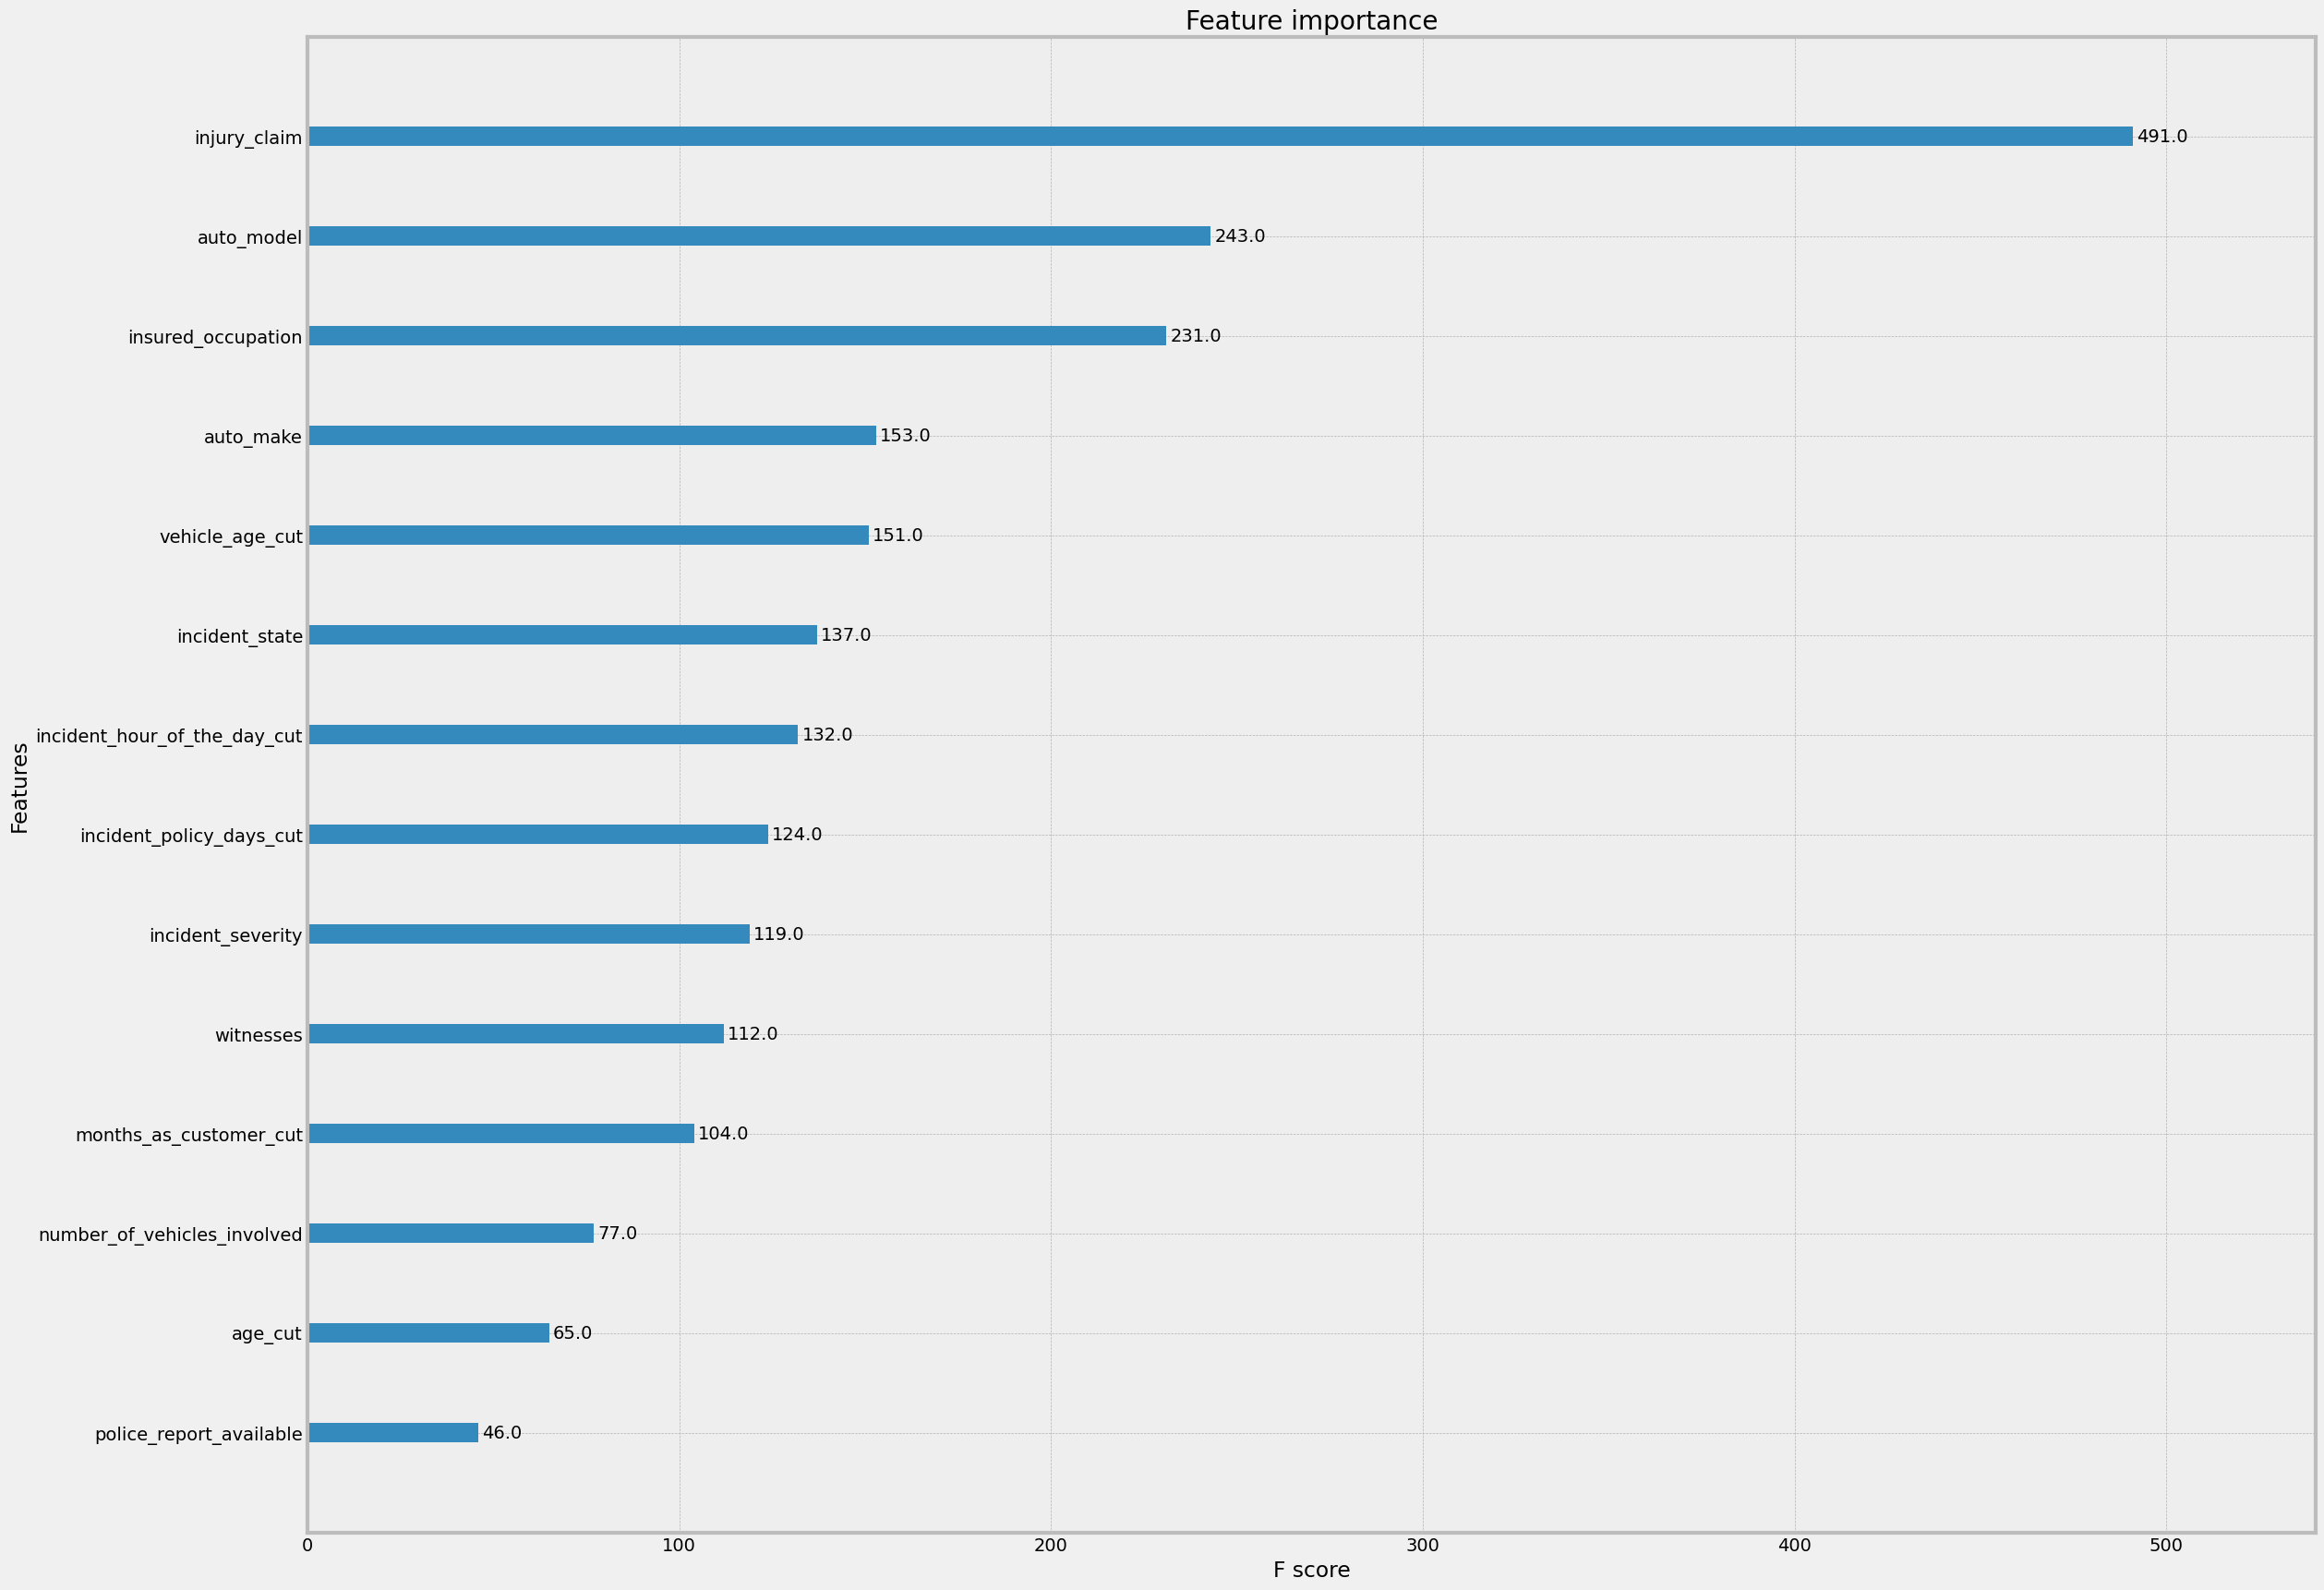

In [166]:
from xgboost import plot_importance
x = XGBClassifier()
x.fit(X_train_scaled, y_train) # fitting the model again on dataframe to identify the feature names

plt.rcParams['figure.figsize'] = [25, 20]
# plot feature importance
plot_importance(x)

AUC: 0.838


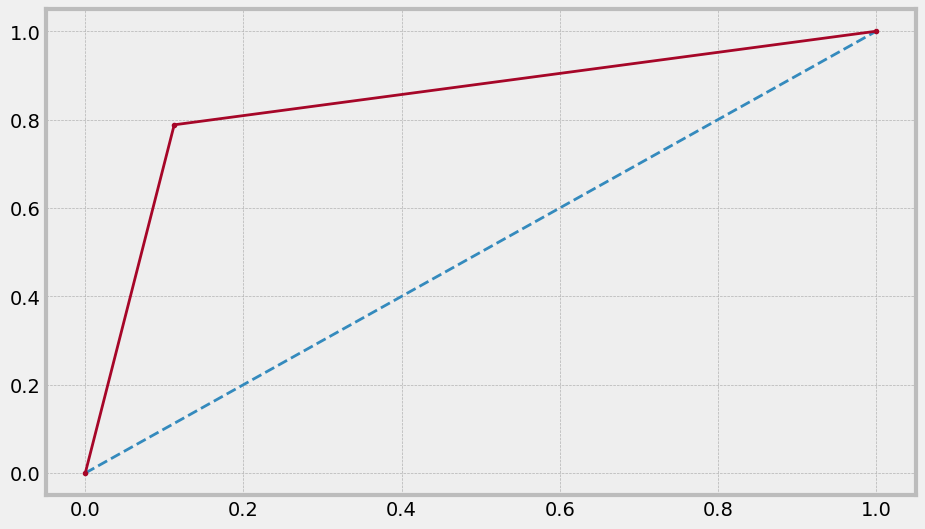

In [169]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
auc = roc_auc_score(y_test, xgb_pred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred)

# plot no skill
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

Accuracy: 85.18%
